In [1]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Upload file here

# Step 3: Preview the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**DATA CLEANING**

In [3]:
# Shape
print("Shape of the dataset:", df.shape)

# Column names and data types
df.info()

Shape of the dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

In [4]:
# Check missing values in each column
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
# Convert TotalCharges to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many nulls were created
print("Nulls in TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Double-check
print("Nulls in TotalCharges after drop:", df['TotalCharges'].isnull().sum())

Nulls in TotalCharges after conversion: 11
Nulls in TotalCharges after drop: 0


In [6]:
#DROP UNNECESSSARY COLUMNS
df.drop('customerID', axis=1, inplace=True)

In [7]:
# Replace Yes/No with 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-7-2703dbf72f9d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [8]:
#CHECK FOR DUPLICATES
df.duplicated().sum()

np.int64(22)

In [9]:
#IF ANY EXISTS
df = df.drop_duplicates()

In [10]:
#SUMMARY OF CLEAN DATA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   object 
 17  

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,0.484023,0.299429,32.520399,0.902996,0.593153,64.888666,2290.353388,0.264907
std,0.369180,0.499780,0.458041,24.520441,0.295985,0.491281,30.064769,2266.820832,0.441315
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.750000,408.312500,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.400000,1403.875000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,89.900000,3807.837500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


**EXPLORATORY DATA ANALYSIS**

We'll analyze how each feature affects customer churn using both numbers and visuals. This phase will give you the insights for your final report.

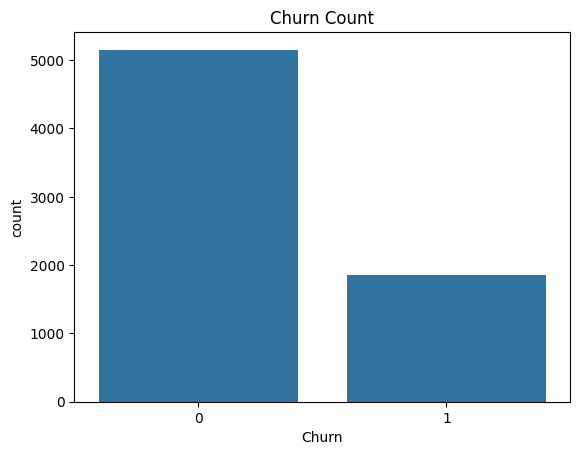

Churn %:
 Churn
0    73.509272
1    26.490728
Name: proportion, dtype: float64


In [11]:
#CHURN DISTRIBUTION
#Lets first check how many customers have churned versus stayed
# Countplot for churn
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

# Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn %:\n", churn_rate)

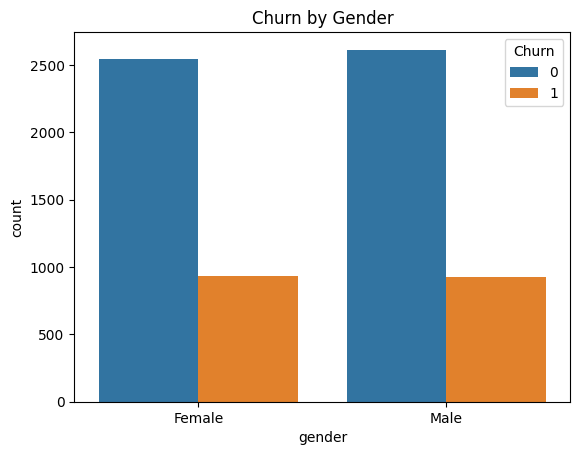

In [12]:
#churn by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

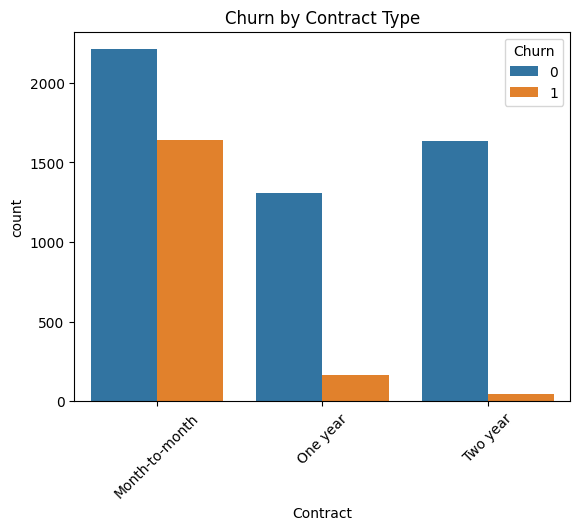

In [13]:
#churn by conttract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

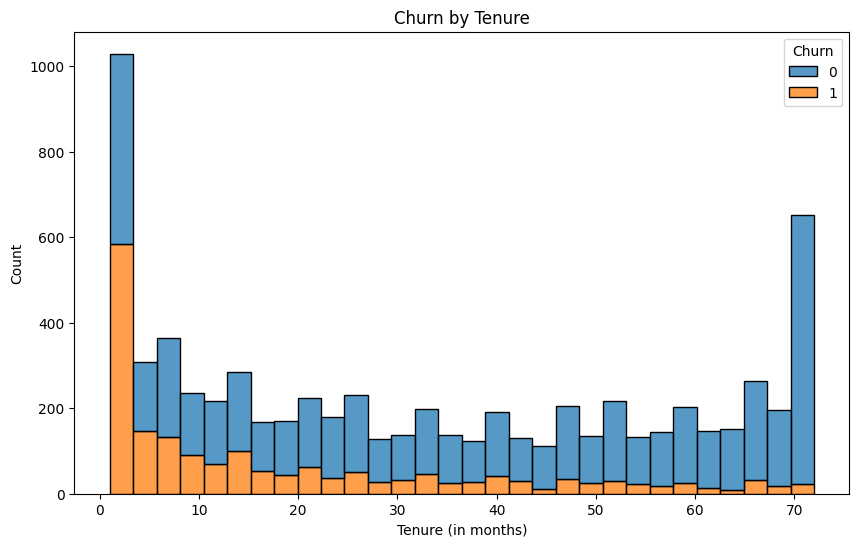

In [15]:
#churn versus tenure
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn by Tenure")
plt.xlabel("Tenure (in months)")
plt.show()

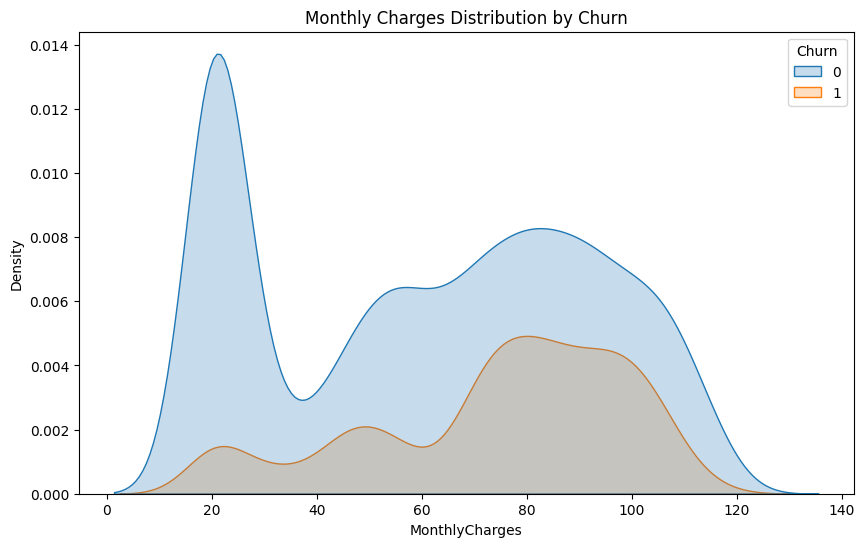

In [16]:
#Monthly charges and churn
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

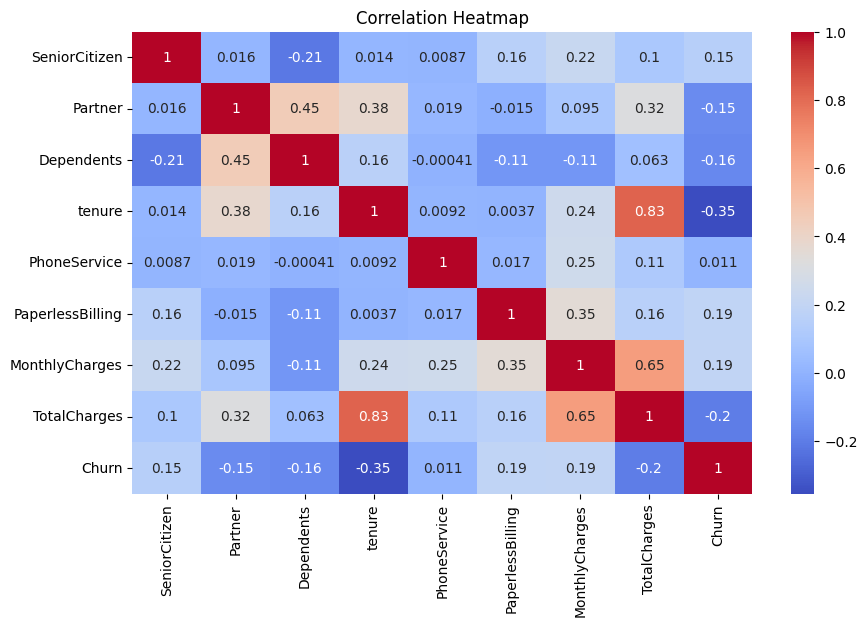

In [17]:
#co relation heat map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**SUMMARY OF EDA**

Churn rate visualized

Insights by gender, contract, tenure, charges

Clean heatmap of correlated variables